In [1]:
import xarray as xr
import numpy as np
import os
os.chdir("/home/nma/HDD/archives/outs/")
import matplotlib.pyplot as plt
import cartopy 
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature


dirs = "/home/nma/HDD/archives/outs/ocnm*"

#shape_feature = ShapelyFeature(reader.geometries(), ccrs.PlateCarree(), facecolor="lime", edgecolor='black', lw=1)


ocns = xr.open_mfdataset(dirs,concat_dim="Time")

/home/nma/nma/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [1]:
import cartopy.feature as cfeature



u = ocns.u.values[30,0,:,:-1]
v = ocns.v.values[30,0,1:,:]

speed = np.sqrt(u*u + v*v)
#plt.contourf(speed)


fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
#ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')


xq,yh = ocns.xq.values,ocns.yh.values

scale = 1e05
x2d,y2d = np.meshgrid(xq,yh)


u = u*np.cos(2 * x2d[:,:-1] / scale + 3 * y2d[:,:-1]/scale)
v = v*np.cos(6*x2d[:,:-1]/scale)


ax.contourf(xq[:-1],yh,speed)
ax.quiver(x2d[:,:-1][::],y2d[:,:-1][::],u[::],v[::],color='black')
#ax.coastlines('110m', linewidth=0.8)
ax.add_feature(cfeature.GSHHSFeature('full', edgecolor='black'))

#plt.colorbar(ax=ax)
plt.title("Ocean currents")
#plt.savefig("test.png",dpi=500)


NameError: name 'ocns' is not defined

In [2]:
dir_200 = "/home/nma/HDD/archives/regional2sims/wind_200/"

os.chdir(dir_200)

dsets = xr.open_mfdataset("ocnm*")


/home/nma/nma/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


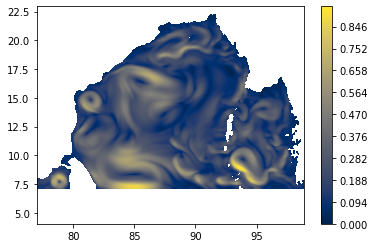

In [3]:
u = dsets.u[:,0,:,:-1]
v = dsets.v[:,0,1:,:]

speed = np.sqrt((u.values*u.values)+(v.values*v.values))
lons,lats = u.xq.values,u.yh.values

plt.contourf(lons,lats,speed[198,:,:],cmap="cividis",levels=1000)
plt.colorbar()

In [ ]:
import matplotlib.animation
import time


fig, ax=plt.subplots()
t = np.ones(10)*time.time()
props = dict(boxstyle='round', facecolor='wheat')
timelabel = ax.text(0.9,0.9, "", transform=ax.transAxes, ha="right", bbox=props)


p = [ax.contour(lons,lats,speed[0,:,:], 1000, cmap= "cividis")]



def update(i):
    for tp in p[0].collections:
        tp.remove()
    p[0] = ax.contour(lons,lats,speed[i,:,:], 1000, cmap= "cividis") 
    t[1:] = t[0:-1]
    t[0] = time.time()
    timelabel.set_text("MOM6 test")
    return p[0].collections+[timelabel]


plt.colorbar(p[0])
ani = matplotlib.animation.FuncAnimation(fig, update, frames=np.shape(speed)[0], 
                                         interval=100, blit=True, repeat=True)
ani.save('animation.mp4')
